In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [7]:
cols = ['ts', 'gx', 'gy', 'gz', 'ax', 'ay', 'az']
df = pd.read_csv('./data-test-snaponly.csv', names = cols)

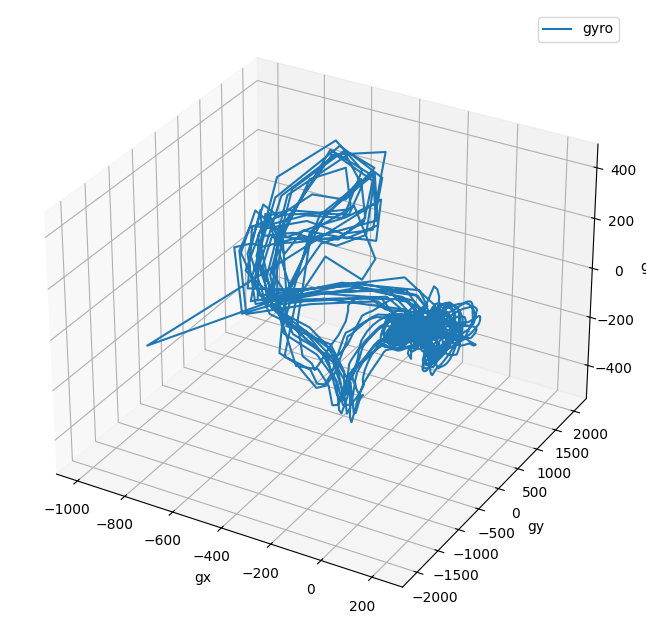

In [8]:
fig = plt.figure(figsize = (10, 8))
gyro = fig.add_subplot(111, projection = '3d')
gyro.plot(df['gx'], df['gy'], df['gz'], label = 'gyro')
gyro.set_xlabel('gx')
gyro.set_ylabel('gy')
gyro.set_zlabel('gz')
gyro.legend()
plt.show()

In [9]:
x = df['gx']
y = df['gy']
z = df['gz']
time = df['ts']
time_points = len(time)

fig = go.Figure(
    data=[go.Scatter3d(x=[x[0]], y=[y[0]], z=[z[0]], mode="markers")],
    layout=dict(scene=dict(xaxis=dict(range=[min(x), max(x)]),
                            yaxis=dict(range=[min(y), max(y)]),
                            zaxis=dict(range=[min(z), max(z)]))),
    frames=[go.Frame(data=[go.Scatter3d(x=[x[k]], y=[y[k]], z=[z[k]], mode="markers")])
            for k in range(0, time_points)]
)

# Add animation controls
fig.update_layout(
    width=800,
    height=600,
    updatemenus=[{
        "buttons": [{
            "args": [None, {"frame": {"duration": 10, "redraw": True},
                              "fromcurrent": True, "transition": {"duration": 10,
                                                                  "easing": "quadratic-in-out"}}],
            "label": "Play",
            "method": "animate"
        }, {
            "args": [[None], {"frame": {"duration": 0, "redraw": True},
                              "mode": "immediate",
                              "transition": {"duration": 0}}],
            "label": "Pause",
            "method": "animate"
        }],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

fig.show()